*Here's a sample Python code for an NLP (Natural Language Processing) project that covers loading and preprocessing datasets, exploratory data analysis (EDA), model training, model evaluation, and building a predictive system. This example uses the IMDb movie reviews dataset to build a sentiment analysis model.*

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# In this example, we use the IMDb movie reviews dataset from Keras.
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)  # We limit the vocabulary to 10,000 most common words.


17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
# Tokenize and pad the sequences
max_sequence_length = 250  # Define the maximum sequence length
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=max_sequence_length)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=max_sequence_length)


*# EDA (Exploratory Data Analysi*

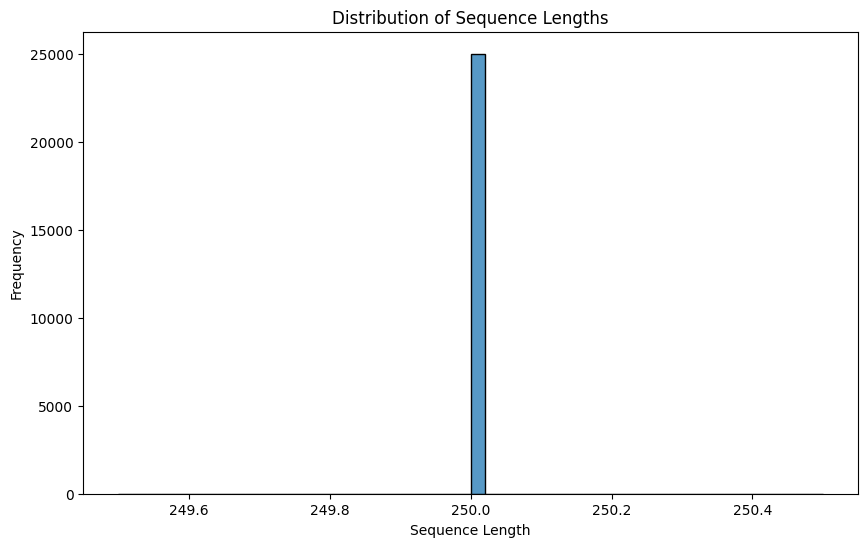

In [ ]:
sequence_lengths = [len(seq) for seq in train_data]
plt.figure(figsize=(10, 6))
sns.histplot(sequence_lengths, bins=50)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Define and train a simple LSTM-based sentiment analysis model
model = keras.Sequential([
    keras.layers.Embedding(10000, 16),
    keras.layers.LSTM(64),
    keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 180801 (706.25 KB)
Trainable params: 180801 (706.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/10
157/157 [==============================] - 46s 246ms/step - loss: 0.5307 - accuracy: 0.7165 - val_loss: 0.3418 - val_accuracy: 0.8576
Epoch 2/10
157/157 [==============================] - 29s 180ms/step - loss: 0.2737 - accuracy: 0.8928 - val_loss: 0.2925 - val_accuracy: 0.8836
Epoch 3/10
157/157 [==============================] - 12s 78ms/step - loss: 0.1960 - accuracy: 0.9291 - val_loss: 0.2894 - val_accuracy: 0.8790
Epoch 4/10
157/157 [==============================] - 11s 71ms/step - loss: 0.1491 - accuracy: 0.9486 - val_loss: 0.3048 - val_accuracy: 0.8678
Epoch 5/10
157/157 [==============================] - 6s 38ms/step - loss: 0.1169 - accuracy: 0.9615 - val_loss: 0.3753 - val_accuracy: 0.8734
Epoch 6/10
157/157 [==============================] - 9s 57ms/step - loss: 0.0959 - accuracy: 0.9676 - val_loss: 0.4381 - val_accuracy: 0.8682
Epoch 7/10
157/157 [==============================] - 5s 32ms/step - loss: 0.0782 - accuracy: 0.9743 - val_loss: 0.5358 - val_accuracy: 

In [ ]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


782/782 [==============================] - 6s 8ms/step - loss: 0.5848 - accuracy: 0.8463
Test Accuracy: 84.63%


In [ ]:
# Classification report
y_pred = (model.predict(test_data) > 0.5).astype("int32")
print(classification_report(test_labels, y_pred))


782/782 [==============================] - 4s 5ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     12500
           1       0.88      0.80      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [ ]:
# Create a predictive system
def predict_sentiment(review, model, tokenizer, max_length):
    review = [review]
    review = tokenizer.texts_to_sequences(review)
    review = pad_sequences(review, maxlen=max_length)
    sentiment = "Positive" if model.predict(review) > 0.5 else "Negative"
    return sentiment

In [ ]:
# Example usage of the predictive system
example_review = "Hello"
sentiment = predict_sentiment(example_review, model, Tokenizer(), max_sequence_length)
print(f"Predicted Sentiment: {sentiment}")

1/1 [==============================] - 0s 30ms/step
Predicted Sentiment: Negative
